# Построение модели оттока клиентов сети фитнес-центров «Культурист-датасаентист» 

В целях подготовки предложений для учета при разработке Сетью фитнес-центров «Культурист-датасаентист» стратегии взаимодействия с пользователями и их удержания будет проведен анализ анкет пользователей.
В ходе анализа
1. Будут загружены и проанализированы имеющиеся данные.
2. Будет проведен исследовательский анализ данных.
3. Будет построена модель прогнозирования оттока пользователей.
4. Будет проведена кластеризация пользователей.

По результатам анализа:
- будет обучена модель прогнозирующая вероятность оттока (на уровне следующего месяца) для каждого клиента;
- сформированы типичные портреты пользователей: выделены несколько наиболее ярких групп и охарактеризованы их основные свойства;
- проанализированы основные признаки, наиболее сильно влияющие на отток;
- будут сформулированы основные выводы и разработаны рекомендации по повышению качества работы с клиентами:

    - выделены целевые группы клиентов;
    - предложены меры по снижению оттока;
    - определены другие особенности взаимодействия с клиентами.

In [1]:
# Импорт необходимых библиотек
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage

#from sklearn.linear_model import Lasso, Ridge, LogisticRegression
#from sklearn.tree import DecisionTreeRegressor
#from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, RandomForestClassifier

#from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
#from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
#from sklearn.metrics import roc_auc_score
#import itertools
#import numpy.random




## Шаг 1. Загрузка данных

In [2]:
# прочитаем из csv-файла данные с набором данных пользователей
fitness_club = pd.read_csv('/datasets/gym_churn.csv')


In [3]:
# Рассмотрим информацию об имеющихся данных
fitness_club.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
gender                               4000 non-null int64
Near_Location                        4000 non-null int64
Partner                              4000 non-null int64
Promo_friends                        4000 non-null int64
Phone                                4000 non-null int64
Contract_period                      4000 non-null int64
Group_visits                         4000 non-null int64
Age                                  4000 non-null int64
Avg_additional_charges_total         4000 non-null float64
Month_to_end_contract                4000 non-null float64
Lifetime                             4000 non-null int64
Avg_class_frequency_total            4000 non-null float64
Avg_class_frequency_current_month    4000 non-null float64
Churn                                4000 non-null int64
dtypes: float64(4), int64(10)
memory usage: 437.6 KB


Данные содержат 4000 строк и 14 колонок. Пустые значения отсутствуют. Наименования признаков соответствуют типам данных.

## Шаг 2. Исследовательский анализ данных (EDA)

In [4]:
# Ознакомимся с первыми пятью анкетами
fitness_club.head(5)

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0


Имеющиеся категориальные признаки уже приведены к бинарному виду.

In [5]:
# Проанализируем распределение признаком с использованием метода describe
fitness_club.describe()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000


Среди посетителей:
- 51,0% - женщины;
- 84,5% - проживают или работают рядом с фитнесс-залом;
- 48,7% - сотрудники компаний-партнёров;
- 30,9% - зарегистрировались в рамках акции «приведи друга»;
- 90,4% - предоставили контактный телефон;
- контрантный период составляет от 1 до 12 месяцев;
- 41,2% - посещают групповые занятия;
- клиенты в возрасте от 18 до 41 года, со средним и медианным значением - 29 лет;
- суммарная выручка от других услуг фитнес-центра: кафе, спорт-товары, косметический и массажный салон, составляет от 0,15 до 552,59 ед., среднее значение - 146,94 ед., медианное - 136,22 ед.;
- срок до завершения абонемента от 1 до 12 месяца, среднее значение 4,32 месяца, медианное - 1 месяц;
- с момента первого обращения в фитнес-центр прошло от 0 до 31 месяцев, среднее значение - 3,72 месяца, медианное - 3 месяца;
- частота посещений в неделю за все время с начала действия абонемента - от 0 до 6 раз, среднее и медианное значение 1,8 раза.
- частота посещений за последний месяц - от 0 до 6 раз, среднее и медианное значение снижается и составляет 1,7 раза.
- 26,5% посетителей перестали посещать зал. То есть, группы продолживщих посещать зал и превративших не сбалансированы, метрика accuracy будет не показательна.

Средний посетитель - женщина, проживающая или работающая рядом, участвующая в партнерской программе, предоставившая контактный телефон, оформившая абонемент на один месяц, в возрасте 29 лет, тратившая на дополнительные услуги 140 единиц, с клиентской активностью 3 месяца, посещающая зал 2 раза в неделю, со снижением количества посещений в последний месяц активности.


In [6]:
# Проанализируем среднием значения признаков для оставшихся и ушедших пользователей
fitness_club.groupby('Churn').agg('mean')

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month
Churn,,,,,,,,,,,,,
0,0.510037,0.873086,0.534195,0.353522,0.903709,5.747193,0.464103,29.976523,158.445715,5.283089,4.711807,2.024876,2.027882
1,0.510839,0.768143,0.355325,0.183789,0.902922,1.728558,0.268615,26.989632,115.082899,1.662582,0.990575,1.474995,1.044546


По результатам сравнения средних значений для групп оставшихся клиентов и ушедших можно отметить, что имеется видимое различие по таким признакам, как сотрудники компаний-партнёров, зарегистрировались в рамках акции «приведи друга», контрактный период,посещение групповых занятий, срок до завершения абонемента, время, прощедшее с первого обрашения, частота посещений завсё время и в последний месяц.

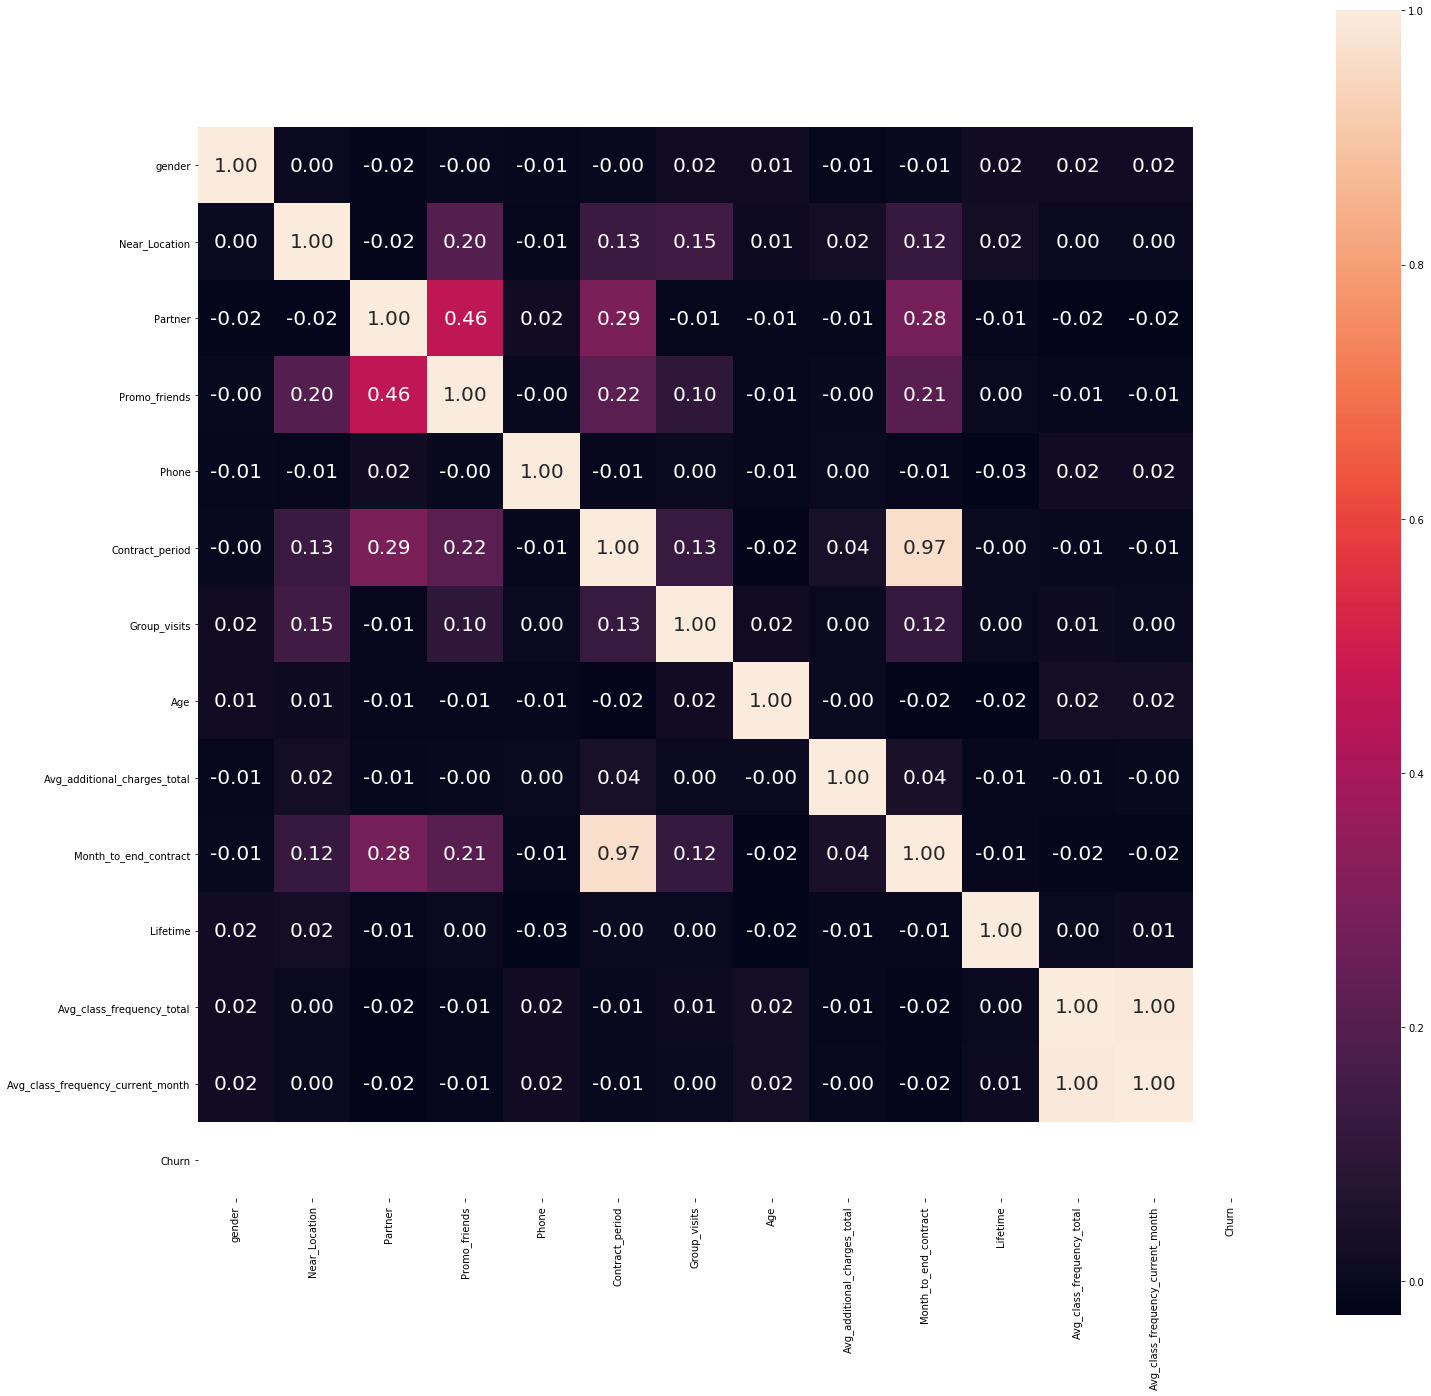

In [7]:
# Построим корреляционную матрицу признаков и тепловую карту для оставшихся пользователей
cm = fitness_club.query('Churn==0').corr()
plt.figure(figsize=(24, 24))
sns.heatmap(cm, annot = True, square=True, fmt='.2f', annot_kws={"fontsize":20})

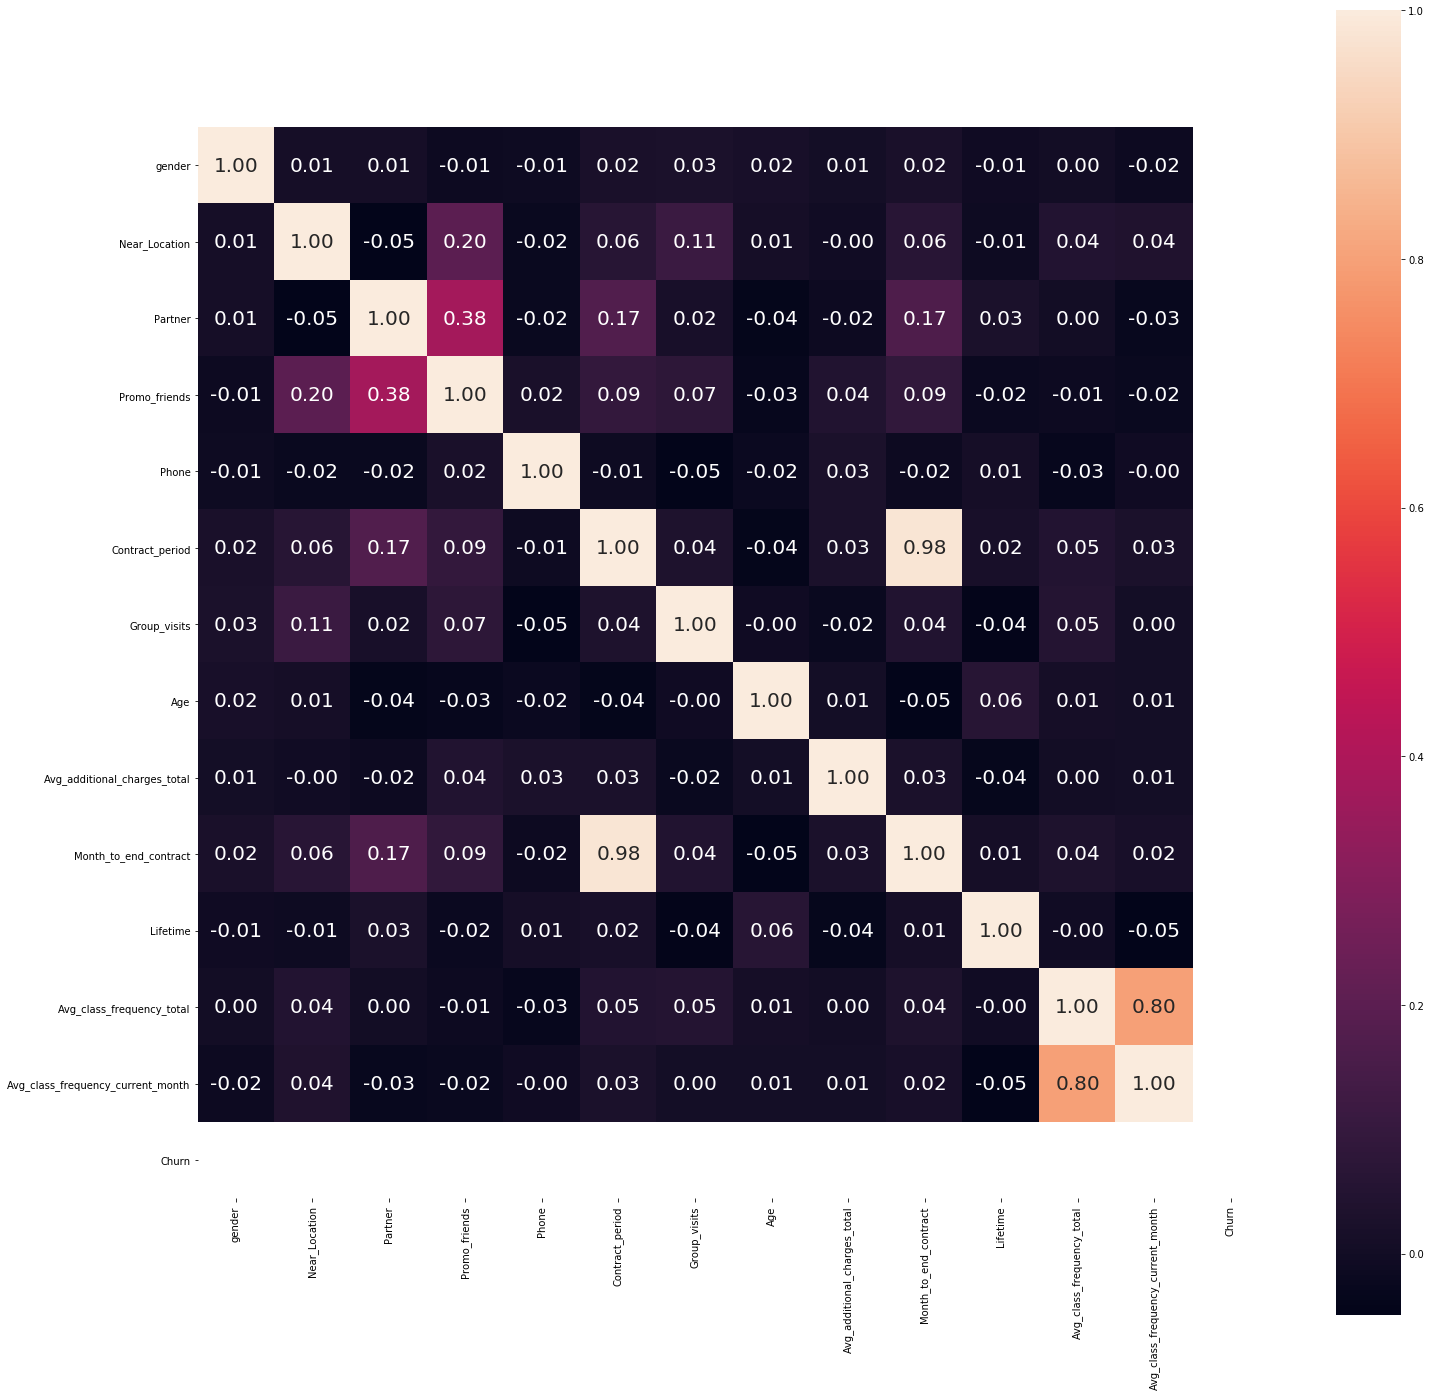

In [8]:
# Построим корреляционную матрицу признаков и тепловую карту для ушедших пользователей
cm = fitness_club.query('Churn==1').corr()
plt.figure(figsize=(24, 24))
sns.heatmap(cm, annot = True, square=True, fmt='.2f', annot_kws={"fontsize":20})

В соответствии с построенными тепловыми картами, высокие коэффициенты корреляции у следующих пар признаков:
- Месяцев до завершения абонемента и Контрактный период;
- Частота посещений за всё время и Частота посещений в последний месяц.

/opt/conda/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/opt/conda/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


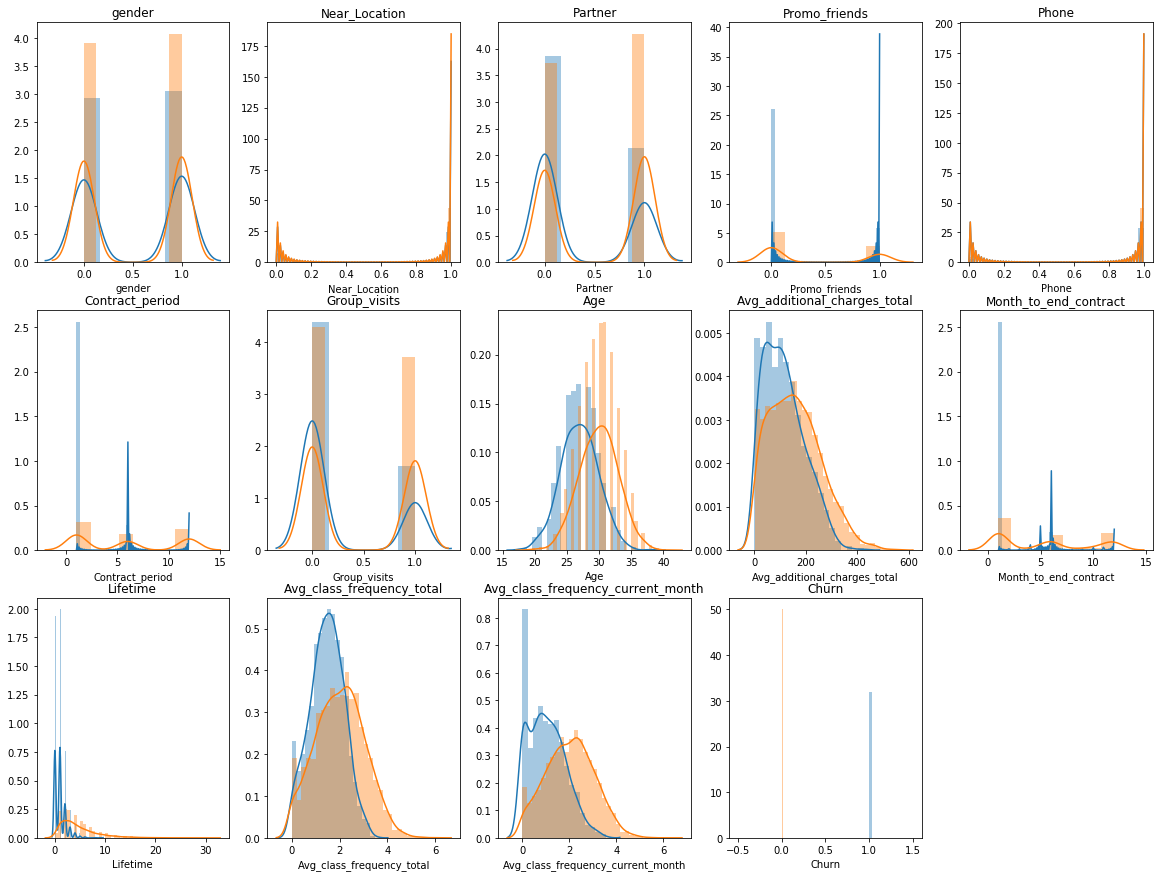

In [9]:
plt.subplots(figsize=(20,15))
plots_in_row = 5
for i, col in enumerate(fitness_club.columns.values):
    sns.distplot(fitness_club.query('Churn==1')[col], ax = plt.subplot(len(fitness_club.columns.values)//plots_in_row + 1, plots_in_row, i+1))
    sns.distplot(fitness_club.query('Churn==0')[col])
    plt.title(col);

Согласно графикам, распределение большинства признаков близко к нормальному, но всё же требует стандартизации. При этом, видимые различия для групп ушедших и оставшихся клиентов по ряду признаков свидетельствуют о том, что по ним можно будет построить достаточно надежную модель прогнозирования оттока пользователей.


## Шаг 3. Построение модели прогнозирования оттока пользователей

In [10]:
# разделим наши данные на признаки (матрица X) и целевую переменную (y)
X = fitness_club.drop(columns = ['Churn'])
y = fitness_club['Churn']


In [11]:
# разделяем модель на обучающую и валидационную выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


In [12]:
#создадим объект класса StandardScaler и применим его к обучающей выборке
scaler = StandardScaler()#ваш код здесь
X_train_st = scaler.fit_transform(X_train) #обучаем scaler и одновременно трансформируем матрицу для обучающей выборки


In [13]:
#применяем стандартизацию к матрице признаков для тестовой выборки
X_test_st = scaler.transform(X_test)#ваш код здесь

In [14]:
# задайте список моделей
models = [LogisticRegression(solver='lbfgs', random_state=0), RandomForestClassifier(n_estimators=100, 
                                                                                     random_state=0)]


In [15]:
# функция, которая вычисляет MAPE
def mape(y_true, y_pred):
    y_error = y_true -y_pred #рассчитайте вектор ошибок
    y_error_abs = [abs(i) for i in y_error]#рассчитайте вектор модуля ошибок
    perc_error_abs = y_error_abs / y_true #рассчитайте вектор относительных ошибок
    mape = (perc_error_abs.sum() / len(y_true))#рассчитайте MAPE
    return mape


In [16]:
# функция, которая принимает на вход модель и данные и выводит метрики
def make_prediction(m, X_train, y_train, X_test, y_test):
    model = m # ваш код здесь
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_probabilities = model.predict_proba(X_test)[:,1]

    
    print_all_metrics(y_test, y_pred, y_probabilities , title='Метрики для модели логистической регрессии:')

In [17]:
# определим функцию, которая будет выводить наши метрики
def print_all_metrics(y_true, y_pred, y_proba, title = 'Метрики классификации'):
    print(title)
    print('\tAccuracy: {:.2f}'.format(accuracy_score(y_true, y_pred)))
    print('\tPrecision: {:.2f}'.format(precision_score(y_true, y_pred)))
    print('\tRecall: {:.2f}'.format(recall_score(y_true, y_pred)))
    

In [18]:
for i in models:
    print(i)
    make_prediction(i, X_train_st, y_train, X_test_st, y_test)
    print()


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
Метрики для модели логистической регрессии:
	Accuracy: 0.92
	Precision: 0.85
	Recall: 0.83

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
Метрики для модели логистической регрессии:
	Accuracy: 0.92
	Precision: 0.84
	Recall: 0.81



Согласно полученным значениям метрик Accuracy, Precision и Recall лучше себя показала модель Логической регрессии (0,93; 0,86; 0,83) чем модель Случайного леса (0,91; 0,83; 0,78).

## Шаг 4. Кластеризация пользователей

In [19]:
# Сформируем выборку в размере 400 записей из имеющихся 4000 - 10% данных
X_sample = X.sample(400)

In [20]:
# стандартизируем выборку из данных
sc = StandardScaler()
X_sc = sc.fit_transform(X)


In [21]:
# Сформируем матрицу расстояний
linked = linkage(X_sc, method = 'ward')

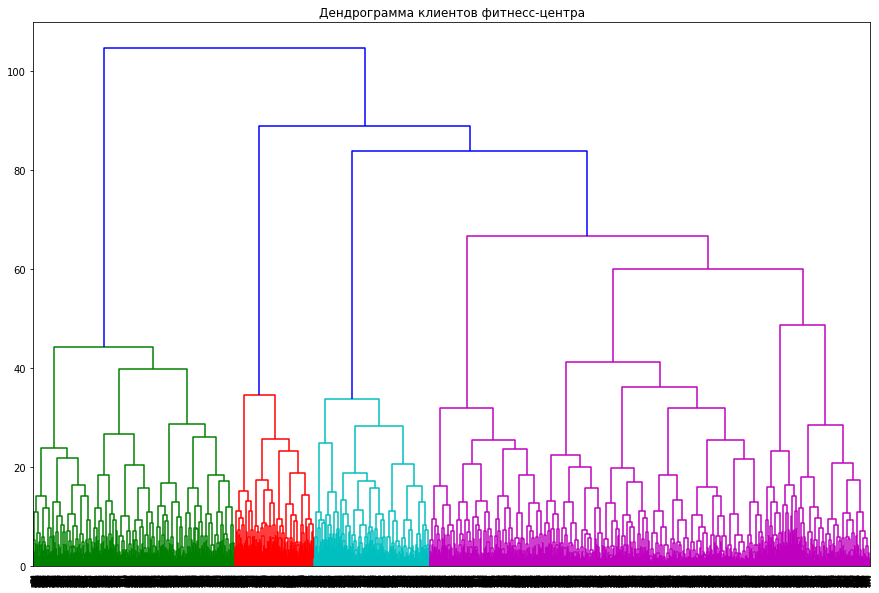

In [22]:
# Построим дендрограмму
plt.figure(figsize=(15, 10))  
dendrogram(linked, orientation='top')
plt.title('Дендрограмма клиентов фитнесс-центра')
plt.show()

In [23]:
# стандартизируем данные для всех данных
sc = StandardScaler()
X_sc = sc.fit_transform(X)
# Исходя из условий проекта зададим модель k_means с количеством кластеров 5
km = KMeans(n_clusters = 5, random_state=0)
# спрогнозируем кластеры для наблюдений (алгоритм присваивает им номера от 0 до 4)
labels = km.fit_predict(X_sc)


In [24]:
# сохраним метки кластера в поле нашего датасета
fitness_club['cluster_km'] = labels


In [25]:
# посчитаем метрику силуэта для нашей кластеризации
print('Silhouette_score: {:.2f}'.format(silhouette_score(X_sc, labels)))


Silhouette_score: 0.14


Учитывая полученное значение метрики, качество кластеризации можно оценить как не удовлетворительное, кластеры размыты.

In [26]:
fitness_club.groupby('cluster_km').agg('mean')

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
cluster_km,,,,,,,,,,,,,,
0,0.502473,0.959446,0.783383,0.574679,1.000000,10.884273,0.543027,29.980218,160.706969,9.950544,4.738872,1.983305,1.976225,0.027695
1,0.522078,0.862338,0.470130,0.306494,0.000000,4.787013,0.425974,29.301299,143.957664,4.475325,3.924675,1.847220,1.716369,0.267532
2,0.495050,0.000000,0.463366,0.079208,1.000000,2.352475,0.215842,28.477228,135.457501,2.198020,2.809901,1.660461,1.477324,0.443564
3,0.485737,1.000000,0.350238,0.240095,1.000000,1.948494,0.341521,28.167987,131.622204,1.856577,2.440571,1.247634,1.012983,0.514263
4,0.560335,0.976105,0.356033,0.229391,0.998805,2.665472,0.473118,30.127838,161.724258,2.455197,4.896057,2.851531,2.849473,0.068100


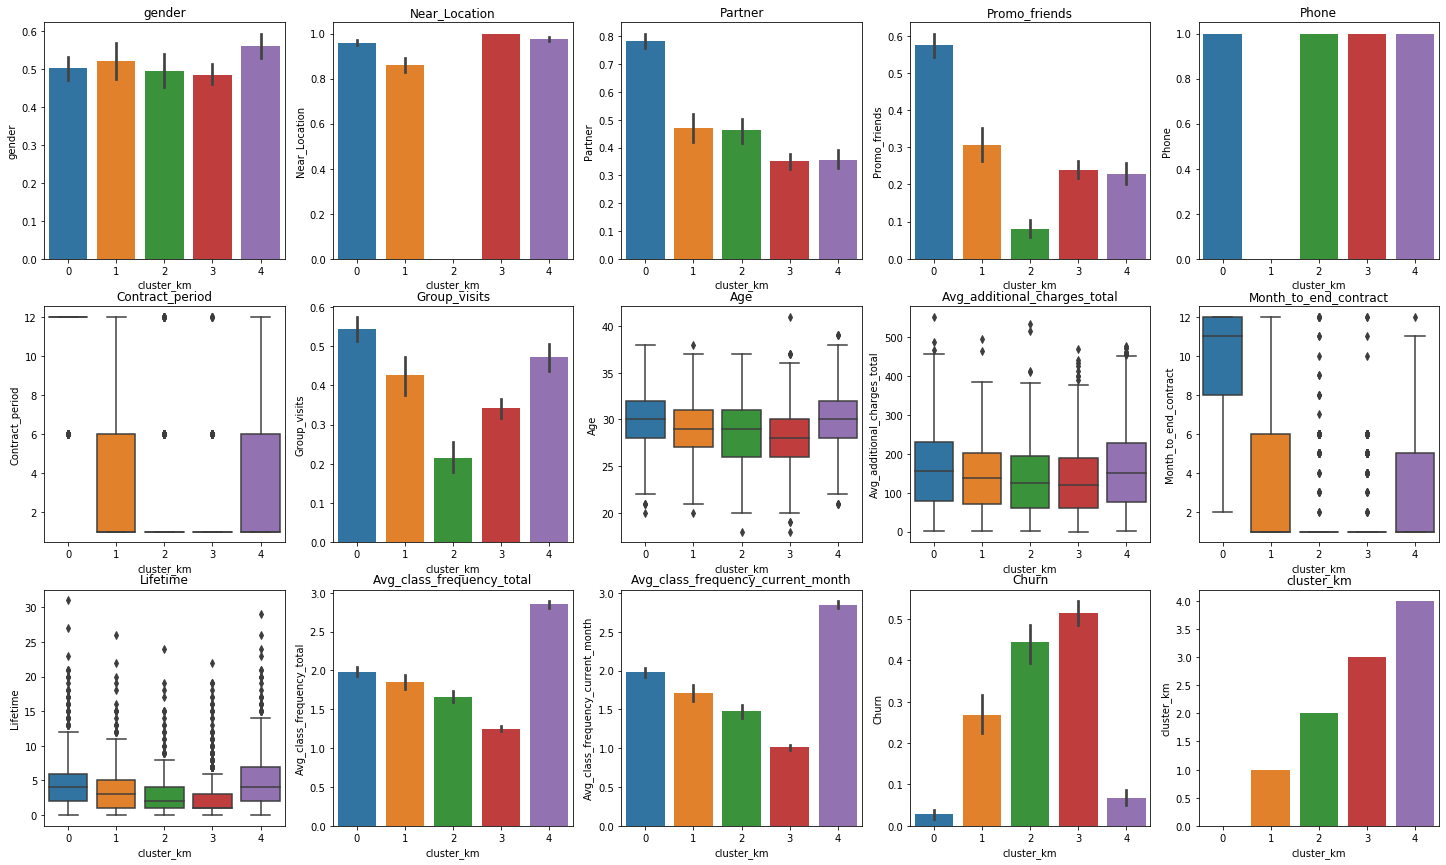

In [27]:
# Построим графики распределения признаков по кластерам
non_binary_vars = ['Age', 'Avg_additional_charges_total', 'Lifetime','Month_to_end_contract', 'Contract_period']
plt.subplots(figsize=(25,20))
for i, col in enumerate(fitness_club.columns.values):
    ax = plt.subplot(len(fitness_club.columns.values)//plots_in_row + 1, plots_in_row, i+1)
    if col in non_binary_vars:
        sns.boxplot(data = fitness_club, x = 'cluster_km', y = col, ax = ax)
    else:
        sns.barplot(data = fitness_club, x = 'cluster_km', y = col, ax = ax)
    plt.title(col)
#plt.tight_layout()
plt.show();

Надежные кластеры можно охарактеризоватьследующими признаками:
- участие в партнерских программах;
- пришедшие в рамках акции "приведи друга";
- посещяющие групповые занятия;
Ненадежные:
- краткосрочные абонементы;
- расходы на дополнительные услуги ниже среднего;
- еженедельная активность ниже среднегос тенденцией к уменьшению в текущем месяце.

## Шаг 5. Выводы и базовые рекомендации по работе с клиентами

Исходя из полученных данных, предлагаю следующие принципы для включения в Стратегию взаимодействия с пользователями:
- увеличение изначальной продолжительности контрактного периода;
- развитие партнерских программ;
- проведение мероприятий по привлечению новых клиентов;
- проведение мероприятий по удержанию действующих клиентов.

Для этого возможно проведение следующих мероприятий:
- пересмотр тарифной программы в сторону повышения привлекательности для клиентов абонементов длительностью более 5 месяцев;
- предоставление льготных условий по партнерским программам с фокусом на организации, находящиеся рядом с фитнесс-залом;
- проведение акции для новых клиентов "Шесть месяцев по цене пяти";
- предоставление скидок на дополнительные услуги постоянным клиентам, у которых с момента первого визита прошло более 4 месяцев, тем, которые участвовали в акции "Приведи друга", а также посещающих зал 2 и болееразав неделю.